<a href="https://colab.research.google.com/github/Geez-l/Project_197/blob/glee-branch/ML_algorithms/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [136]:
# standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### machine learning algorithms ####
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split

#### metrics of evaluation ####
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import PredictionErrorDisplay

### time series ###
from statsmodels.tsa.seasonal import seasonal_decompose

#### Other libraries #####
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder


# Read the dataset from github

In [137]:
## from github
url = "https://raw.githubusercontent.com/Geez-l/Project_197/glee-branch/dataset/dataset.csv"
dataset = pd.read_csv(url)

dataset.head()

,Date,Croptype,Province,Area,Production,Yield
0,1987-01-01,Irrigated Palay,Aklan,6130.0,19309.0,3.149918
1,1987-01-01,Irrigated Palay,Antique,9030.0,28275.0,3.131229
2,1987-01-01,Irrigated Palay,Capiz,6300.0,18540.0,2.942857
3,1987-01-01,Irrigated Palay,Guimaras,6300.0,18540.0,2.942857
4,1987-01-01,Irrigated Palay,Iloilo,21270.0,58187.0,2.735637


In [138]:
dataset.columns

Index(['Date', 'Croptype', 'Province', 'Area', 'Production', 'Yield'], dtype='object')

In [139]:
dataset.head()

,Date,Croptype,Province,Area,Production,Yield
0,1987-01-01,Irrigated Palay,Aklan,6130.0,19309.0,3.149918
1,1987-01-01,Irrigated Palay,Antique,9030.0,28275.0,3.131229
2,1987-01-01,Irrigated Palay,Capiz,6300.0,18540.0,2.942857
3,1987-01-01,Irrigated Palay,Guimaras,6300.0,18540.0,2.942857
4,1987-01-01,Irrigated Palay,Iloilo,21270.0,58187.0,2.735637


# Create features from the date


In [140]:
def create_features(dataset):


    # creating a copy
    dataset1 = dataset.copy()

    # convert 'Date' column to datetime, coercing errors to NaT (Not a Time)
    dataset['Date'] = pd.to_datetime(dataset['Date'], errors='coerce')

    # extracting year, month, quarter from Date
    dataset['Year'] = dataset['Date'].dt.year
    dataset['Month'] = dataset['Date'].dt.month
    dataset['Quarter'] = dataset['Date'].dt.quarter

    return dataset

dataset1 = create_features(dataset)
dataset1.head()


,Date,Croptype,Province,Area,Production,Yield,Year,Month,Quarter
0,1987-01-01,Irrigated Palay,Aklan,6130.0,19309.0,3.149918,1987,1,1
1,1987-01-01,Irrigated Palay,Antique,9030.0,28275.0,3.131229,1987,1,1
2,1987-01-01,Irrigated Palay,Capiz,6300.0,18540.0,2.942857,1987,1,1
3,1987-01-01,Irrigated Palay,Guimaras,6300.0,18540.0,2.942857,1987,1,1
4,1987-01-01,Irrigated Palay,Iloilo,21270.0,58187.0,2.735637,1987,1,1


# One hot encoding for categorical variable

In [141]:
unique = dataset1['Croptype'].unique()
print(unique)

unique1 = dataset1['Province'].unique()
print(unique1)

['Irrigated Palay' 'Rainfed Palay' 'Palay' 'White Corn' 'Yellow Corn'
 'Corn']
['Aklan' 'Antique' 'Capiz' 'Guimaras' 'Iloilo']


## One Hot Encoding of Crop Type and Province that has categorical variables

In [142]:
encoding = OneHotEncoder(sparse_output=False).set_output(transform='pandas')
encode_data = encoding.fit_transform(dataset1[['Croptype', 'Province']])

dataset1 = pd.concat([dataset1.reset_index(drop=True), encode_data.reset_index(drop=True)], axis=1)
dataset1 = dataset1.drop(columns=['Croptype', 'Province'])

In [143]:
dataset1.head()

,Date,Area,Production,Yield,Year,Month,Quarter,Croptype_Corn,Croptype_Irrigated Palay,Croptype_Palay,Croptype_Rainfed Palay,Croptype_White Corn,Croptype_Yellow Corn,Province_Aklan,Province_Antique,Province_Capiz,Province_Guimaras,Province_Iloilo
0,1987-01-01,6130.0,19309.0,3.149918,1987,1,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1987-01-01,9030.0,28275.0,3.131229,1987,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1987-01-01,6300.0,18540.0,2.942857,1987,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1987-01-01,6300.0,18540.0,2.942857,1987,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1987-01-01,21270.0,58187.0,2.735637,1987,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Assigning features (x) and target (y)

In [144]:
dataset1.columns

Index(['Date', 'Area', 'Production', 'Yield', 'Year', 'Month', 'Quarter',
       'Croptype_Corn', 'Croptype_Irrigated Palay', 'Croptype_Palay',
       'Croptype_Rainfed Palay', 'Croptype_White Corn', 'Croptype_Yellow Corn',
       'Province_Aklan', 'Province_Antique', 'Province_Capiz',
       'Province_Guimaras', 'Province_Iloilo'],
      dtype='object')

In [145]:
x = dataset1[['Area','Month','Year','Quarter',  'Croptype_Corn', 'Croptype_Irrigated Palay', 'Croptype_Palay',
       'Croptype_Rainfed Palay', 'Croptype_White Corn', 'Croptype_Yellow Corn',
       'Province_Aklan', 'Province_Antique', 'Province_Capiz',
       'Province_Guimaras', 'Province_Iloilo']]
y = dataset1['Production']

# Split the data

In [146]:
from sklearn.model_selection import train_test_split

# train-test split, shuffle set to none when dealing TS
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, shuffle=False)


# Visualization of the splitting of the train and test dataset

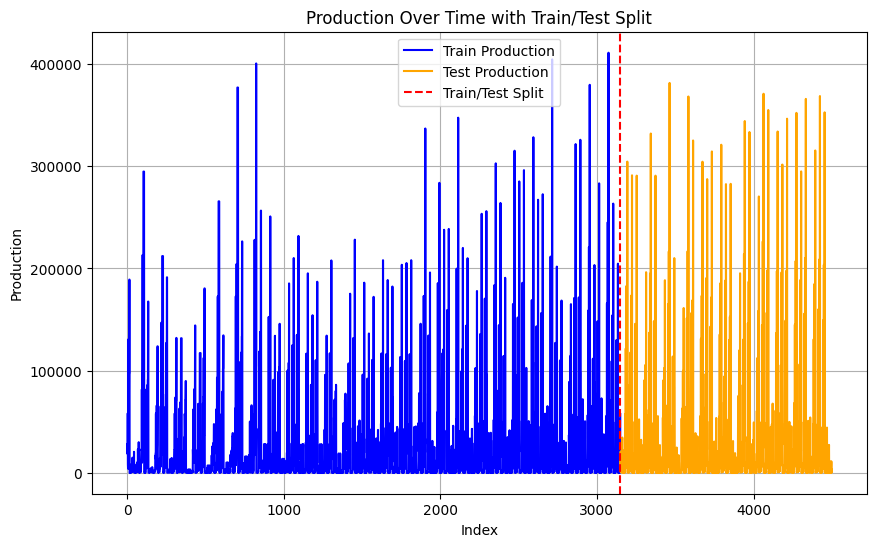

In [147]:
import matplotlib.pyplot as plt

# calculate the indices for the split point
split_index = len(x_train)

# train
plt.figure(figsize=(10, 6))
plt.plot(y_train.index, y_train.values, label='Train Production', color='blue')

# test
plt.plot(y_test.index, y_test.values, label='Test Production', color='orange')

# vertical line for the train/test split
plt.axvline(x=split_index, color='red', linestyle='--', label='Train/Test Split')

# labels and title
plt.xlabel('Index')
plt.ylabel('Production')
plt.title('Production Over Time with Train/Test Split')

plt.legend()
plt.grid(True)
plt.show()


### Creating copy of the dataset (x_test values)

In [148]:
dataset_test = x_test.copy()

### Adding new column to the dataset

In [149]:
dataset_test['Actual_Production'] = y_test.values

# Linear Regression

In [150]:
# Scaling the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [153]:
# Initializing and fit the model
linearRegression = LinearRegression()
linearRegression.fit(x_train_scaled, y_train)

LinearRegression()

In [154]:
# Evaluate the model on the test set
y_pred = linearRegression.predict(x_test_scaled)

Cross-validation

In [155]:
# Cross-validation (Linear Regression)
cv_scores = cross_val_score(linearRegression, x_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')  # 5-fold CV
print(f"Cross-validation Mean MSE: {-cv_scores.mean()}")

Cross-validation Mean MSE: 137952516.19853783


# Prediction

In [156]:
# predicting production using Linear Regression
pred_linearReg_prod = linearRegression.predict(x_test_scaled)

dataset_test["LR Production Prediction"] = pred_linearReg_prod

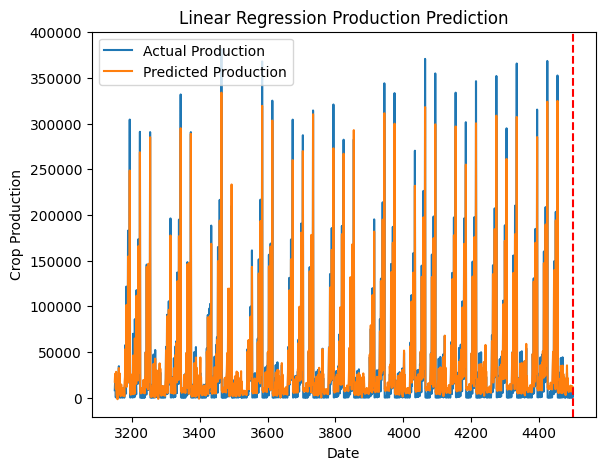

In [157]:
# Data Visualization
ax = dataset_test['Actual_Production'].plot(figsize=(6.5, 5), label="Actual Production")
dataset_test["LR Production Prediction"].plot(ax=ax, label="Predicted Production")
ax.axvline(x=dataset_test.index[-1], color='red', ls='--')  # Add a line to indicate the split (last data point)

plt.xlabel("Date")
plt.ylabel("Crop Production")
plt.title("Linear Regression Production Prediction")
plt.legend(loc="upper left")
plt.show()


       Actual     Predicted
3150   8199.0  17534.432378
3151  18263.0  26222.432378
3152  20998.0  24366.432378
3153    331.0   9758.432378
3154  18584.0  28278.432378
Mean Squared Error (MSE): 89392598.21342967
Mean Absolute Error (MAE): 7032.247269477866
R-squared (R2): 0.9743558542683883
Mean Absolute Percentage Error (MAPE): 34.38011531453118


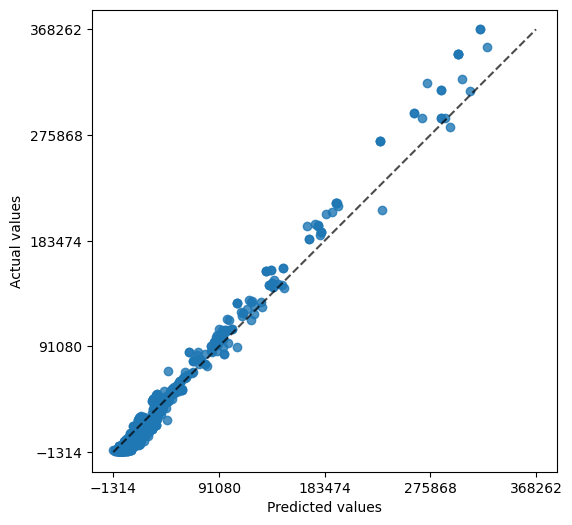

In [158]:
# prompt: compare actual and prediced values in dataframe

# Comparing Actual and Predicted Values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df.head())

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

#Visualization of prediction errors
fig, ax = plt.subplots(figsize=(6, 6))
PredictionErrorDisplay.from_predictions(y_test, y_pred, kind="actual_vs_predicted", ax=ax)
plt.show()

#Evaluation Metrics

MSE & R2

In [159]:
from sklearn.metrics import mean_squared_error, r2_score

# MSE and R2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 89392598.21342967
R-squared: 0.9743558542683883


RMSE

In [160]:
# Calculate RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 9454.765899451433


MAPE

In [161]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'Mean Absolute Percentage Error: {mape}')


Mean Absolute Percentage Error: 34.38011531453118


# Visualizing performance

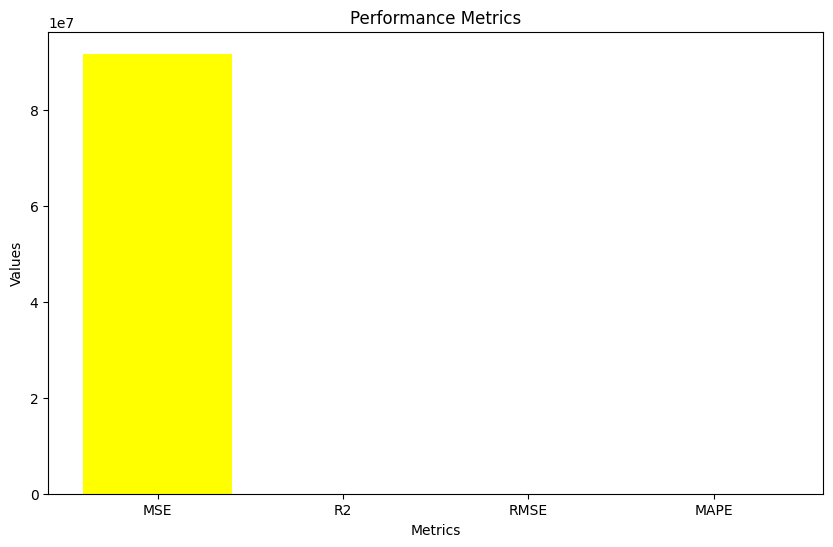

In [162]:
"""
Mean Squared Error: 91746824.53068545
R-squared: 0.9736804949660358
Root Mean Squared Error: 9578.456270750807
Mean Absolute Percentage Error: 45.41163745582623

"""
# Store metrics and their names
mse = 91746824.53068545
r2 = 0.9736804949660358
rmse = 9578.456270750807
mape = 45.41163745582623

metrics = [mse, r2, rmse, mape]
metric_names = ['MSE', 'R2', 'RMSE', 'MAPE']

plt.figure(figsize=(10,6))
plt.bar(metric_names, metrics, color=['yellow','green', 'blue', 'pink'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics')
plt.show()

In [165]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, GridSearchCV
import numpy as np

# creating cross-fold validation scheme
folds = KFold(n_splits=10, shuffle=True, random_state=42)

# specify range of hyperparameters to tune (though LinearRegression has no hyperparameters to tune except fit_intercept)
param_grid = {'fit_intercept': [True, False]}  # You can tune the fit_intercept parameter

# perform grid search
model_cv = GridSearchCV(estimator=LinearRegression(),
                        param_grid=param_grid,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        n_jobs=-1,
                        return_train_score=True)

# fit the model
model_cv.fit(x_train_scaled, y_train)

# to view the best parameter and score
print("Best Parameters:", model_cv.best_params_)
print("Best Score:", model_cv.best_score_)


Fitting 10 folds for each of 2 candidates, totalling 20 fits
Best Parameters: {'fit_intercept': True}
Best Score: 0.9602138763169279


# Retraining

In [180]:
test_model = model_cv
y_pred = test_model.predict(x_test_scaled)

In [181]:
print("Actual vs Predicted:")
for actual, predicted in zip(y_test[:5], y_pred[:5]):
    print(f"Actual: {actual}, Predicted: {predicted}")

Actual vs Predicted:
Actual: 8199.0, Predicted: 17534.432377741447
Actual: 18263.0, Predicted: 26222.432377741447
Actual: 20998.0, Predicted: 24366.432377741447
Actual: 331.0, Predicted: 9758.432377741447
Actual: 18584.0, Predicted: 28278.432377741447


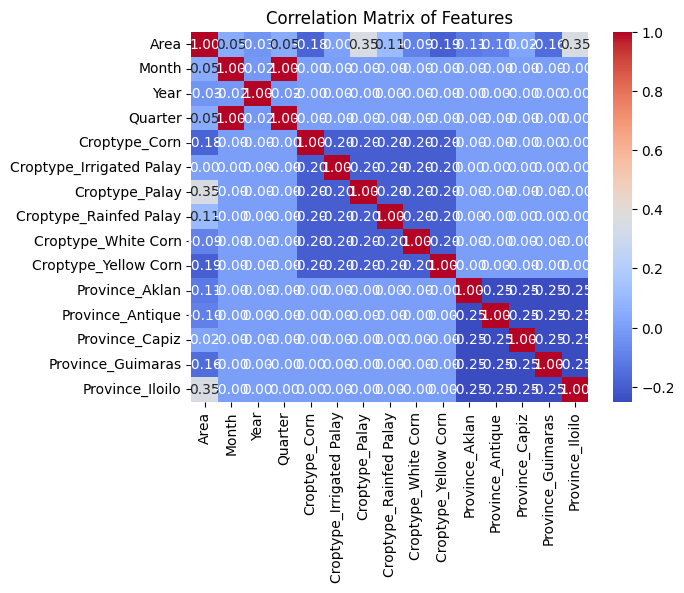

In [182]:
# Check for correlations between features
import seaborn as sns

corr_matrix = x_train.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()

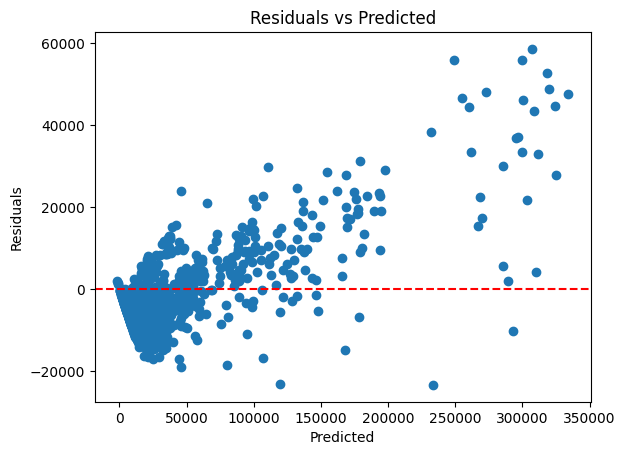

In [183]:
# Plot residuals
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()


[0.96021388 0.65917297]
[{'fit_intercept': True}, {'fit_intercept': False}]


In [167]:
test_model = LinearRegression(fit_intercept=True)
test_model.fit(x_train_scaled, y_train)

y_predict = test_model.predict(x_test_scaled)

mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_predict)


In [172]:
print(f'MSE:{mse}')
print(f'R2:{r2}')
print(f'RMSE:{rmse}')
print(f'MAPE:{mape}')

MSE:89392598.21342967
R2:0.9743558542683883
RMSE:9454.765899451433
MAPE:34.38011531453118


In [177]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted_1': y_pred, 'Predicted_2':y_predict})
comparison_df.head(20)

,Actual,Predicted_1,Predicted_2
3150,8199.0,17534.432378,17534.432378
3151,18263.0,26222.432378,26222.432378
3152,20998.0,24366.432378,24366.432378
3153,331.0,9758.432378,9758.432378
3154,18584.0,28278.432378,28278.432378
3155,4671.0,5438.432378,5438.432378
3156,1350.0,1502.432378,1502.432378
3157,13440.0,10894.432378,10894.432378
3158,139.0,-1713.567622,-1713.567622
3159,3610.0,4054.432378,4054.432378


# Improve Performance

RFE for Ridge

In [96]:
# Variables Selection
from sklearn.feature_selection import RFE

# Model Creation
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV

In [102]:
# Check for NaN values
print(x_train.isnull().sum())  # For features
print(y_train.isnull().sum())  # For target variable

   # Check for infinite values
print(np.isinf(x_train_scaled).sum())
print(np.isinf(y_train).sum())

Area       0
Month      0
Year       0
Quarter    0
dtype: int64
0
0
0


In [103]:
x_train = x_train.fillna(x_train.mean())
y_train = y_train.fillna(y_train.mean())

In [104]:
x_train = x_train.replace([np.inf, -np.inf], np.nan)
y_train = y_train.replace([np.inf, -np.inf], np.nan)

In [106]:
from sklearn.preprocessing import LabelEncoder
x_train = x_train.apply(LabelEncoder().fit_transform)

In [107]:
print(x_train.shape)
print(y_train.shape)

(3150, 4)
(3150,)


In [108]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 10, shuffle = True, random_state = 79)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 11))}]


# step-3: perform grid search
# 3.1 specify model
lm = Ridge()
lm.fit(x_train, y_train)
rfe = RFE(lm)

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe,
                        param_grid = hyper_params,
                        scoring= 'r2',
                        cv = folds,
                        verbose = 1,
                        n_jobs=-1,
                        return_train_score=True)

# fit the model
model_cv.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=KFold(n_splits=10, random_state=79, shuffle=True),
             estimator=RFE(estimator=Ridge()), n_jobs=-1,
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10]}],
             return_train_score=True, scoring='r2', verbose=1)

In [110]:
# cv results

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.016974,0.001042,0.004551,0.000327,1,{'n_features_to_select': 1},-0.009532,0.010478,0.015226,0.000247,...,0.004055,0.006539,0.005141,0.006569,0.007801,0.006047,0.005424,0.005824,0.006042,0.001075
1,0.014596,0.002484,0.004434,0.000413,2,{'n_features_to_select': 2},-0.009535,0.010479,0.015228,0.000247,...,0.004055,0.006539,0.005141,0.006569,0.007801,0.006047,0.005424,0.005824,0.006042,0.001075
2,0.013190,0.007023,0.007047,0.003295,3,{'n_features_to_select': 3},-0.010368,0.010764,0.013119,-0.001491,...,0.005306,0.007696,0.006624,0.007120,0.008417,0.006890,0.006459,0.006146,0.006971,0.000982
3,0.007795,0.001722,0.004439,0.001130,4,{'n_features_to_select': 4},0.598010,0.549398,0.589268,0.551355,...,0.573053,0.577692,0.573291,0.574147,0.574842,0.573793,0.578629,0.576016,0.575225,0.002129
4,0.009209,0.001350,0.004550,0.000841,5,{'n_features_to_select': 5},0.598010,0.549398,0.589268,0.551355,...,0.573053,0.577692,0.573291,0.574147,0.574842,0.573793,0.578629,0.576016,0.575225,0.002129
5,0.008542,0.001375,0.004358,0.000583,6,{'n_features_to_select': 6},0.598010,0.549398,0.589268,0.551355,...,0.573053,0.577692,0.573291,0.574147,0.574842,0.573793,0.578629,0.576016,0.575225,0.002129
6,0.009640,0.001044,0.004773,0.000956,7,{'n_features_to_select': 7},0.598010,0.549398,0.589268,0.551355,...,0.573053,0.577692,0.573291,0.574147,0.574842,0.573793,0.578629,0.576016,0.575225,0.002129
7,0.007980,0.001718,0.004896,0.001789,8,{'n_features_to_select': 8},0.598010,0.549398,0.589268,0.551355,...,0.573053,0.577692,0.573291,0.574147,0.574842,0.573793,0.578629,0.576016,0.575225,0.002129
8,0.009459,0.001630,0.004846,0.001046,9,{'n_features_to_select': 9},0.598010,0.549398,0.589268,0.551355,...,0.573053,0.577692,0.573291,0.574147,0.574842,0.573793,0.578629,0.576016,0.575225,0.002129
9,0.011282,0.002524,0.006394,0.002126,10,{'n_features_to_select': 10},0.598010,0.549398,0.589268,0.551355,...,0.573053,0.577692,0.573291,0.574147,0.574842,0.573793,0.578629,0.576016,0.575225,0.002129


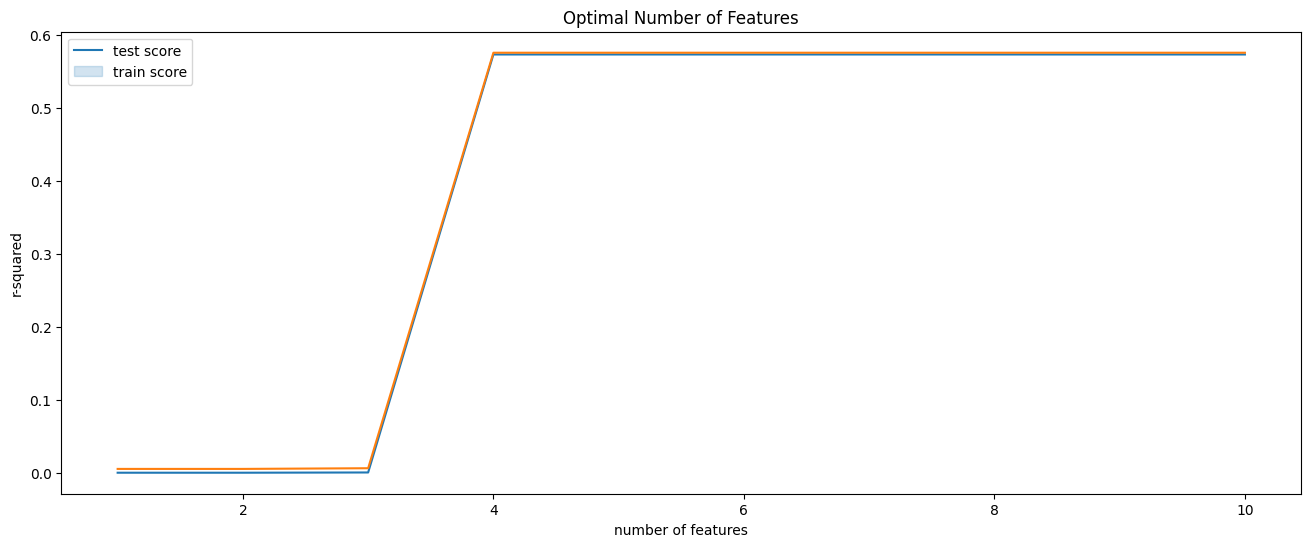

In [111]:
# plotting cv results
plt.figure(figsize=(16,6))
sns.lineplot(x="param_n_features_to_select", y="mean_test_score", data=cv_results)
sns.lineplot(x="param_n_features_to_select", y="mean_train_score", data=cv_results)
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [112]:
print(model_cv.best_params_)
value = model_cv.best_params_

{'n_features_to_select': 4}


In [113]:
rfe = RFE(lm, n_features_to_select=value['n_features_to_select'])
rfe = rfe.fit(x_train, y_train)

# find top features
colfls = x_train.columns[rfe.support_]
colfls

# changing set to hold top features
x_train = x_train[colfls]
x_test = x_test[colfls]

# Alpha Value Hyperparameter for Ridge

In [114]:
# creating cross-fold validation scheme
folds = KFold(n_splits = 10, shuffle = True, random_state = 42)

# specify range of hyperparameters to tune
alpha = [{'alpha': np.arange(0.00000001,0.0008,0.000001)}]

# perform grid search
model_cv = GridSearchCV(estimator = Ridge(),
                        param_grid = alpha,
                        scoring= 'r2',
                        cv = folds,
                        verbose = 1,
                        n_jobs=-1,
                        return_train_score=True)

# fit the model
model_cv.fit(x_train, y_train)


print(model_cv.best_params_)
value = model_cv.best_params_

Fitting 10 folds for each of 800 candidates, totalling 8000 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(), n_jobs=-1,
             param_grid=[{'alpha': array([1.0000e-08, 1.0100e-06, 2.0100e-06, 3.0100e-06, 4.0100e-06,
       5.0100e-06, 6.0100e-06, 7.0100e-06, 8.0100e-06, 9.0100e-06,
       1.0010e-05, 1.1010e-05, 1.2010e-05, 1.3010e-05, 1.4010e-05,
       1.5010e-05, 1.6010e-05, 1.7010e-05, 1.8010e-05, 1.9010e-05,
       2.0010e-05...
       7.7001e-04, 7.7101e-04, 7.7201e-04, 7.7301e-04, 7.7401e-04,
       7.7501e-04, 7.7601e-04, 7.7701e-04, 7.7801e-04, 7.7901e-04,
       7.8001e-04, 7.8101e-04, 7.8201e-04, 7.8301e-04, 7.8401e-04,
       7.8501e-04, 7.8601e-04, 7.8701e-04, 7.8801e-04, 7.8901e-04,
       7.9001e-04, 7.9101e-04, 7.9201e-04, 7.9301e-04, 7.9401e-04,
       7.9501e-04, 7.9601e-04, 7.9701e-04, 7.9801e-04, 7.9901e-04])}],
             return_train_score=True, scoring='r2', verbose=1)

In [115]:
print(model_cv.best_params_)
value = model_cv.best_params_

{'alpha': 0.0007990100000000001}


In [116]:
lm = Ridge(alpha=value['alpha'])
lm.fit(x_train, y_train)
y_predict_test = lm.predict(x_test)
y_predict_train = lm.predict(x_train)

metric_ridge = {'Ridge':{}}
r2_train_lr = r2_score(y_train, y_predict_train)
print("R2 Train:", r2_train_lr)
metric_ridge['Ridge']['R2 Train']=r2_train_lr

r2_test_lr = r2_score(y_test, y_predict_test)
print("R2 Test:", r2_test_lr)
metric_ridge['Ridge']['R2 Test']=r2_test_lr

rss_train_lr = np.sum((y_predict_train - y_train) ** 2)
print("RSS Train:", rss_train_lr)
metric_ridge['Ridge']['RSS Train']=rss_train_lr

rss_test_lr = np.sum((y_predict_test - y_test) ** 2)
print("RSS Test:", rss_test_lr)
metric_ridge['Ridge']['RSS Test']=rss_test_lr

mse_train_lr = mean_squared_error(y_train, y_predict_train)
print("MSE Train:", mse_train_lr)
metric_ridge['Ridge']['MSE Train']=mse_train_lr

mse_test_lr = mean_squared_error(y_test, y_predict_test)
print("MSE Test:", mse_test_lr)
metric_ridge['Ridge']['MSE Test']=mse_test_lr

rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_predict_train))
print("RMSE Train:", rmse_train_lr)
metric_ridge['Ridge']['RMSE Train']=rmse_train_lr

rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_predict_test))
print("RMSE Test:", rmse_test_lr)
metric_ridge['Ridge']['RMSE Test']=rmse_test_lr

mape_train_lr = mean_absolute_percentage_error(y_train, y_predict_train)
print("MAPE Train:", mape_train_lr)
metric_ridge['Ridge']['MAPE Train']=mape_train_lr

mape_test_lr = mean_absolute_percentage_error(y_test, y_predict_test)
print("MAPE Test:", mape_test_lr)
metric_ridge['Ridge']['MAPE Test']=mape_test_lr

R2 Train: 0.5751817814801854
R2 Test: -755.8704798168272
RSS Train: 3466694327319.095
RSS Test: 3561792863114653.0
MSE Train: 1100537881.6886017
MSE Test: 2638365083788.632
RMSE Train: 33174.35578407819
RMSE Test: 1624304.4923254482
MAPE Train: 196.9860133674533
MAPE Test: 4490.882837555264


# Validating assumptions of Ridge LR

<ipython-input-117-3a7229611d96>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - y_predict_test), bins=20)


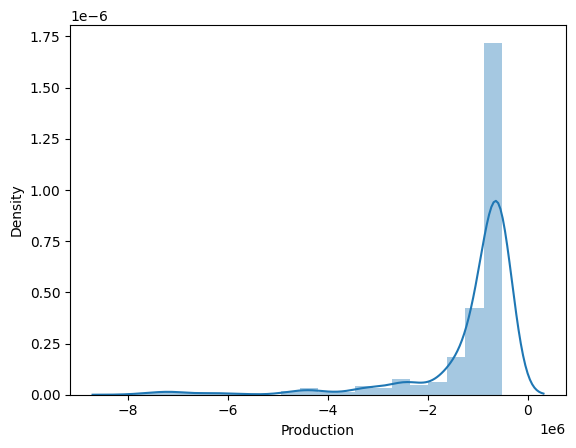

In [117]:
sns.distplot((y_test - y_predict_test), bins=20)
plt.show()

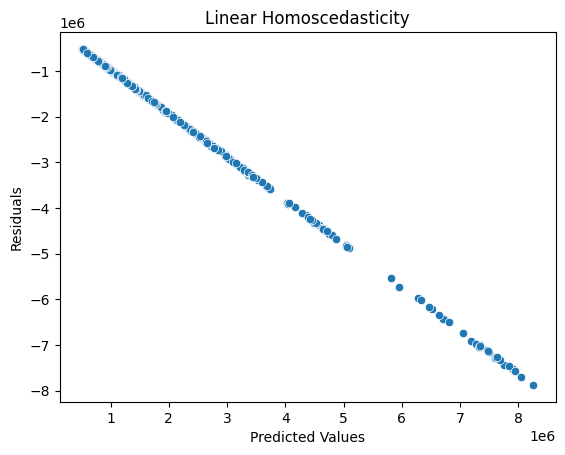

In [118]:
# linear homoscedasticity
sns.scatterplot(x=y_predict_test, y=(y_test - y_predict_test))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Linear Homoscedasticity')
plt.show()


In [119]:
import statsmodels.api as sm

dw = sm.stats.stattools.durbin_watson(y_test - y_predict_test)
print(f'Durbin watson test: {dw}')

Durbin watson test: 1.0222380800630009


The Durbin-Watson statistic ranges in value from 0 to 4. A value near 2 indicates non-autocorrelation; a value toward 0 indicates positive autocorrelation; a value toward 4 indicates negative autocorrelation. In this case it is extremely close to 2 which indicates non-autocorrelation.

In [120]:
"""
mse = 91746824.53068545
r2 = 0.9736804949660358
rmse = 9578.456270750807
mape = 45.41163745582623
"""
mse = mean_squared_error(y_test, y_predict_test)
print(f'MSE: {mse}')
r2 = r2_score(y_test, y_predict_test)
print(f'R2: {r2}')
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')
mape = mean_absolute_percentage_error(y_test, y_predict_test)
print(f'MAPE: {mape}')

MSE: 2638365083788.632
R2: -755.8704798168272
RMSE: 1624304.4923254482
MAPE: 4490.882837555264
